In [16]:
!pip install wordCloud
!pip install imblearn
!pip install matplotlib
!pip install seaborn 


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 186.2 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.4 kB 186.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 140.3 kB/s eta 0:00:02
  

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

In [42]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [44]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,171.00,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.34,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,245.00,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1
767,1.0,93.0,NaN,31.0,0.0,30.4,315.00,23.0,0


In [48]:
df.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [50]:
(df.isnull().sum()/len(df))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [58]:
def count_outliers_lqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

outlier_count = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_count[col] = count_outliers_iqr(df[col])

outlier_count_df = pd.DataFrame(list(outlier_count.items()),
                               columns=['Column', 'Outlier Count'])

outlier_count_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


In [60]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

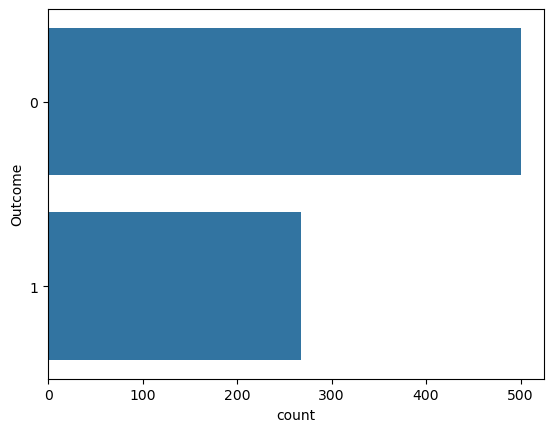

In [64]:
sns.countplot(data=df, y='Outcome')

Text(0.5, 0.98, 'Histogram of Pima Indian Diabetes Dataset Features')

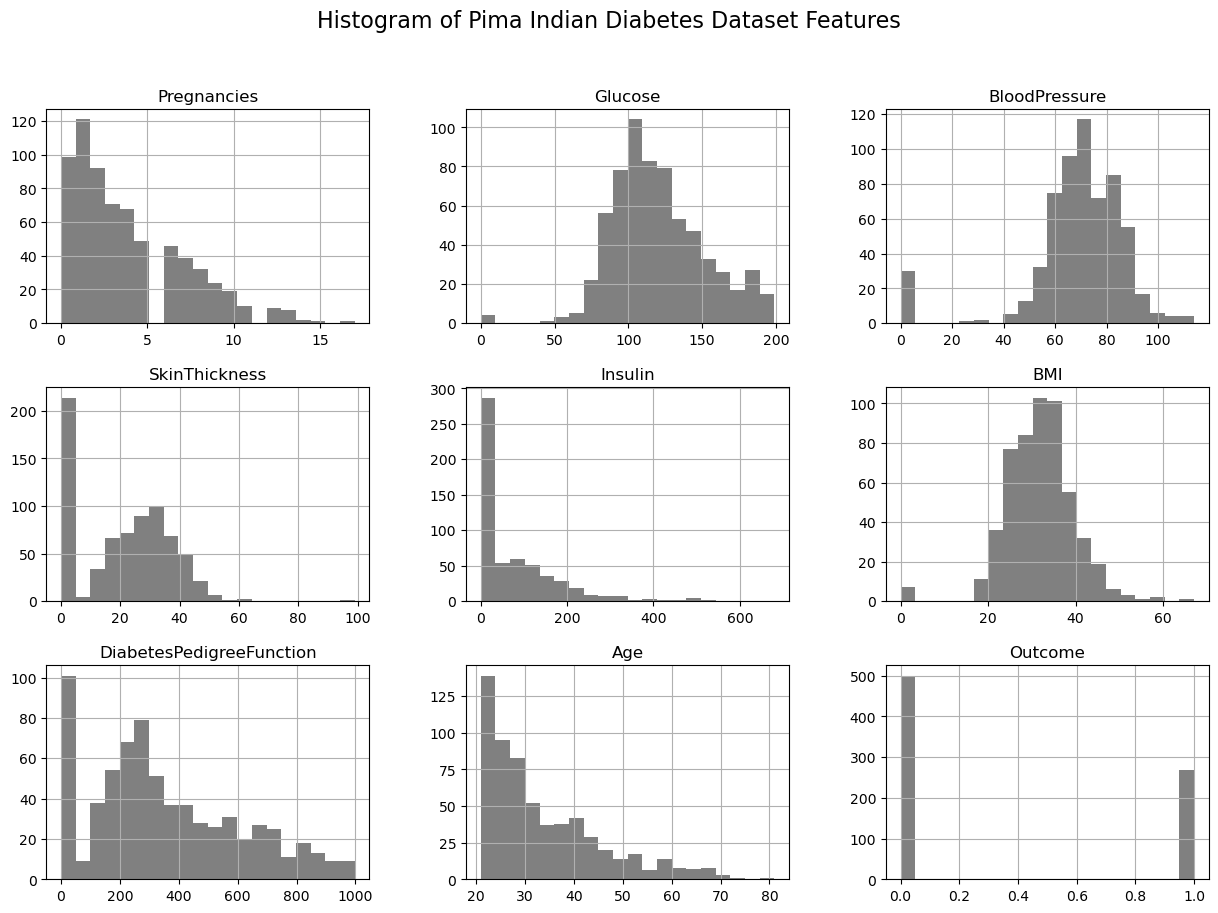

In [74]:
df.hist(bins=20, figsize=(15, 10), layout=(3, 3),
       color='Grey');
plt.suptitle('Histogram of Pima Indian Diabetes Dataset Features',
            fontsize=16)

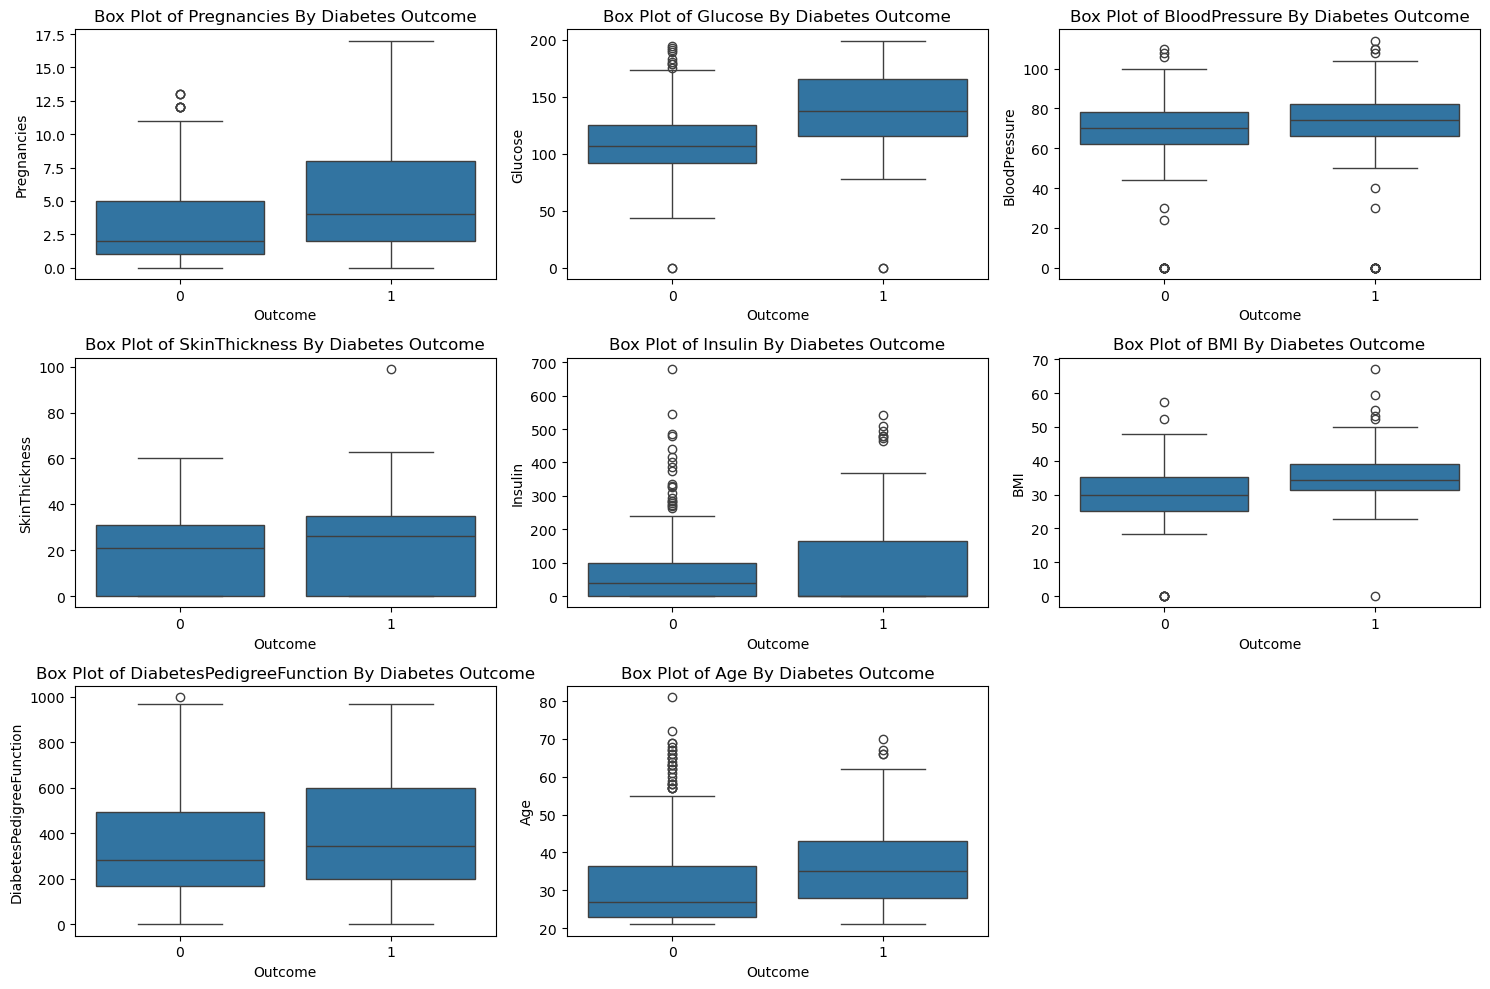

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)  # Corrected the subplot index
        sns.boxplot(x='Outcome', y=column, data=data)
        plt.title(f'Box Plot of {column} By Diabetes Outcome')  # Added correct column name
    plt.tight_layout()
    plt.show()

plot_boxplots(df)


<Axes: >

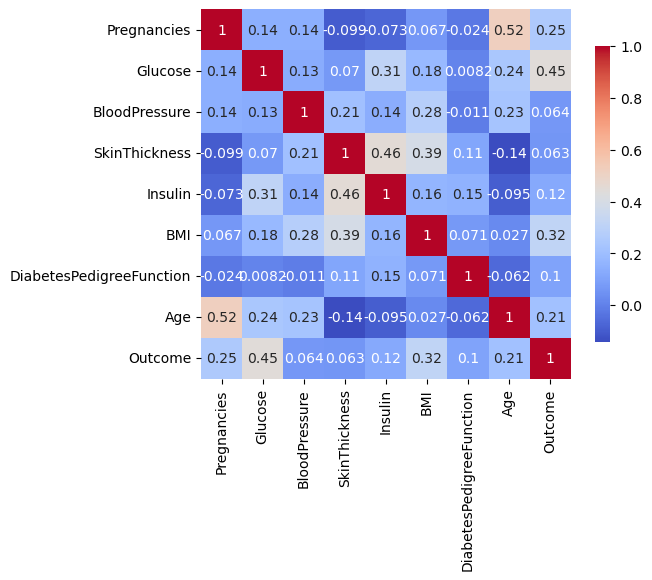

In [94]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',
           square=True, cbar_kws={"shrink": .8})

In [100]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


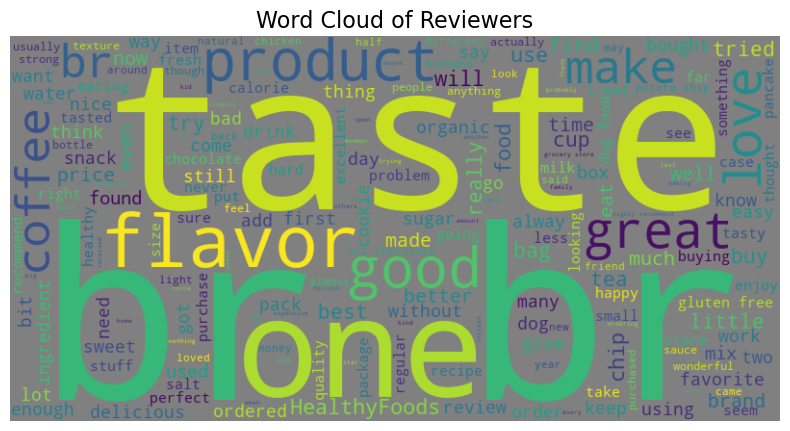

In [142]:
text = "".join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='grey',  
                          colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5)) 
    plt.imshow(wordcloud, interpolation='bilinear')  
    plt.axis('off')
    plt.title('Word Cloud of Reviewers', fontsize=16)  
    plt.show()

plot_wordcloud(text)

In [132]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [136]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [138]:
smote = SMOTE(random_state=24)
x_resampled, y_resampled = smote.fit_resample(x,y)

<Axes: xlabel='count', ylabel='Outcome'>

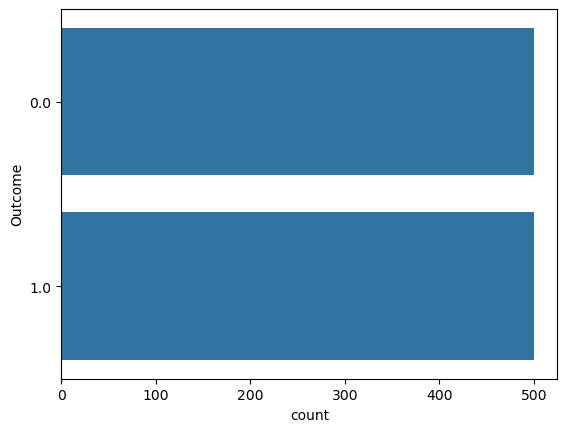

In [140]:
sns.countplot(data=x_resampled, y=y_resampled)

In [146]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,128.0,72.0,35.0,0.0,37.06,627.0,37.0,1.0
1,1.0,85.0,66.0,29.0,0.0,38.34,351.0,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,672.0,32.0,1.0


In [158]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [162]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.636579,0.106957,0.154460,0.890193,-0.804539,0.636740,1.105895,0.347062
1,-0.950373,-1.309179,-0.201275,0.506064,-0.804539,0.830548,-0.025469,-0.236274
2,1.271360,1.918294,-0.319853,-1.350562,-0.804539,-1.446693,1.290357,-0.139051
